In [156]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split ,learning_curve
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import pickle


In [134]:
df.info()
print(df.shape)
df['CROP'].unique()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N_SOIL       2200 non-null   int64  
 1   P_SOIL       2200 non-null   int64  
 2   K_SOIL       2200 non-null   int64  
 3   TEMPERATURE  2200 non-null   float64
 4   HUMIDITY     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   RAINFALL     2200 non-null   float64
 7   STATE        2200 non-null   object 
 8   CROP_PRICE   2200 non-null   int64  
 9   CROP         2200 non-null   object 
dtypes: float64(4), int64(4), object(2)
memory usage: 172.0+ KB
(2200, 10)


array(['Rice', 'Maize', 'ChickPea', 'KidneyBeans', 'PigeonPeas',
       'MothBeans', 'MungBean', 'Blackgram', 'Lentil', 'Pomegranate',
       'Banana', 'Mango', 'Grapes', 'Watermelon', 'Muskmelon', 'Apple',
       'Orange', 'Papaya', 'Coconut', 'Cotton', 'Jute', 'Coffee'],
      dtype=object)

In [136]:
df=pd.read_csv(r"C:\Users\Lenovo\Desktop\datasets\indiancrop_dataset.csv")
df.sample(8)

,N_SOIL,P_SOIL,K_SOIL,TEMPERATURE,HUMIDITY,ph,RAINFALL,STATE,CROP_PRICE,CROP
1410,81,30,48,28.523797,92.096884,6.041027,29.866814,Tamil Nadu,10181,Muskmelon
1746,35,66,47,31.701837,91.662322,6.953439,48.838106,Uttar Pradesh,900,Papaya
68,69,46,41,23.641248,80.285979,5.012140,263.110330,Assam,4100,Rice
2169,111,28,26,27.773633,64.478587,6.937353,192.712124,West Bengal,350,Coffee
1331,92,21,48,25.816922,82.043255,6.377427,54.829634,Tamil Nadu,1850,Watermelon
378,36,68,20,17.061045,23.772015,5.864430,81.834205,Karnataka,5500,KidneyBeans
721,25,71,24,28.495387,60.448484,7.187722,74.915595,Madhya Pradesh,450,Blackgram
1591,29,140,195,23.640830,90.952579,5.560521,116.743132,Uttar Pradesh,600,Apple


In [138]:
df.describe()
crop[0]

'MungBean'

In [140]:

df.isnull().mean()*100
#no missing values

N_SOIL         0.0
P_SOIL         0.0
K_SOIL         0.0
TEMPERATURE    0.0
HUMIDITY       0.0
ph             0.0
RAINFALL       0.0
STATE          0.0
CROP_PRICE     0.0
CROP           0.0
dtype: float64

In [142]:
# df.hist(bins=50)

In [144]:
x=df.iloc[:,[0,1,2,3,4,5,6]]
y=df.iloc[:,9]

x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2)
print(y)
# print('hi')

0         Rice
1         Rice
2         Rice
3         Rice
4         Rice
         ...  
2195    Coffee
2196    Coffee
2197    Coffee
2198    Coffee
2199    Coffee
Name: CROP, Length: 2200, dtype: object


In [146]:
model=RandomForestClassifier()
model.fit(x_train,y_train)

RandomForestClassifier()

In [147]:
from sklearn.metrics import accuracy_score,mean_squared_error,r2_score,f1_score, classification_report
y_pred=model.predict(x_test)
# print(model.score(y_pred,y_test))

In [150]:
# print(model.predict([[14	,5,	36	,24.926391	,85.190981	,5.832526	,104.769380		]]))
crop=model.predict([[20,	50,	20	,30,	90,	10,	50]])
print(model.predict([[10,20,34,25,85,7,300]]))
print(crop[0])



['Coconut']
MungBean


C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [152]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       Apple       1.00      1.00      1.00        21
      Banana       1.00      1.00      1.00        22
   Blackgram       1.00      1.00      1.00        23
    ChickPea       1.00      1.00      1.00        17
     Coconut       1.00      1.00      1.00        24
      Coffee       1.00      1.00      1.00        21
      Cotton       1.00      1.00      1.00        20
      Grapes       1.00      1.00      1.00        19
        Jute       1.00      0.89      0.94        27
 KidneyBeans       1.00      1.00      1.00        27
      Lentil       1.00      1.00      1.00        23
       Maize       1.00      1.00      1.00        20
       Mango       1.00      1.00      1.00        18
   MothBeans       1.00      1.00      1.00        16
    MungBean       1.00      1.00      1.00        17
   Muskmelon       1.00      1.00      1.00        15
      Orange       1.00      1.00      1.00        21
      Papaya       1.00    

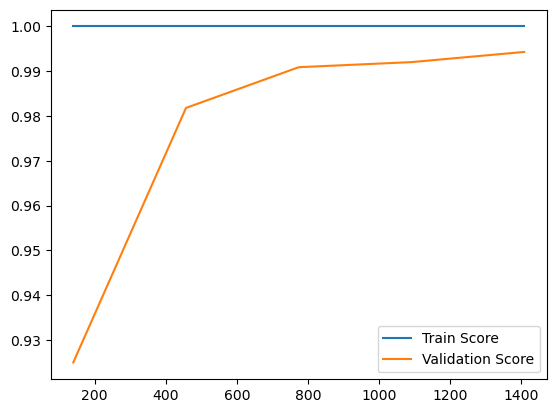

In [154]:



train_sizes, train_scores, test_scores = learning_curve(
    model, x_train, y_train, cv=5, scoring='accuracy'
)

train_mean = train_scores.mean(axis=1)
test_mean = test_scores.mean(axis=1)

plt.plot(train_sizes, train_mean, label="Train Score")
plt.plot(train_sizes, test_mean, label="Validation Score")
plt.legend()
plt.show()


In [158]:
pickle.dump(model,open('crop_rec_model.pkl','wb'))

In [ ]:
#finding the min and max values of each column in the dataframe
for col in df:
    print(f'{col}: max = {df[col].max()}, min = {df[col].min()}')